# Rubin-Roman Observations 2027

Roman’s theoretical launch will be in Oct 2026, meaning the first RGBTDS seasons are expected in early 2027

Meanwhile the timing of RGPS observations not yet clear - first epoch observations likely in 2027 but majority may be in 2028; the maximum duration will be 2yrs.  

In 2027-2028, Rubin will be in years 2-3.  Templates will have been acquired but the ‘augmented’ cadence in the Bulge fields won’t start until year 4 (2029).  Rubin observation cadence in the Plane is pretty uniform throughout the survey.  

In [82]:
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import numpy as np
#from astropy.time import Time, TimeDelta
#from astropy import units as u
from datetime import datetime, timedelta

/var/folders/1d/5hlyfsgd0kl_nd815xmp9cv00000gn/T/ipykernel_67577/3285809218.py:129: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


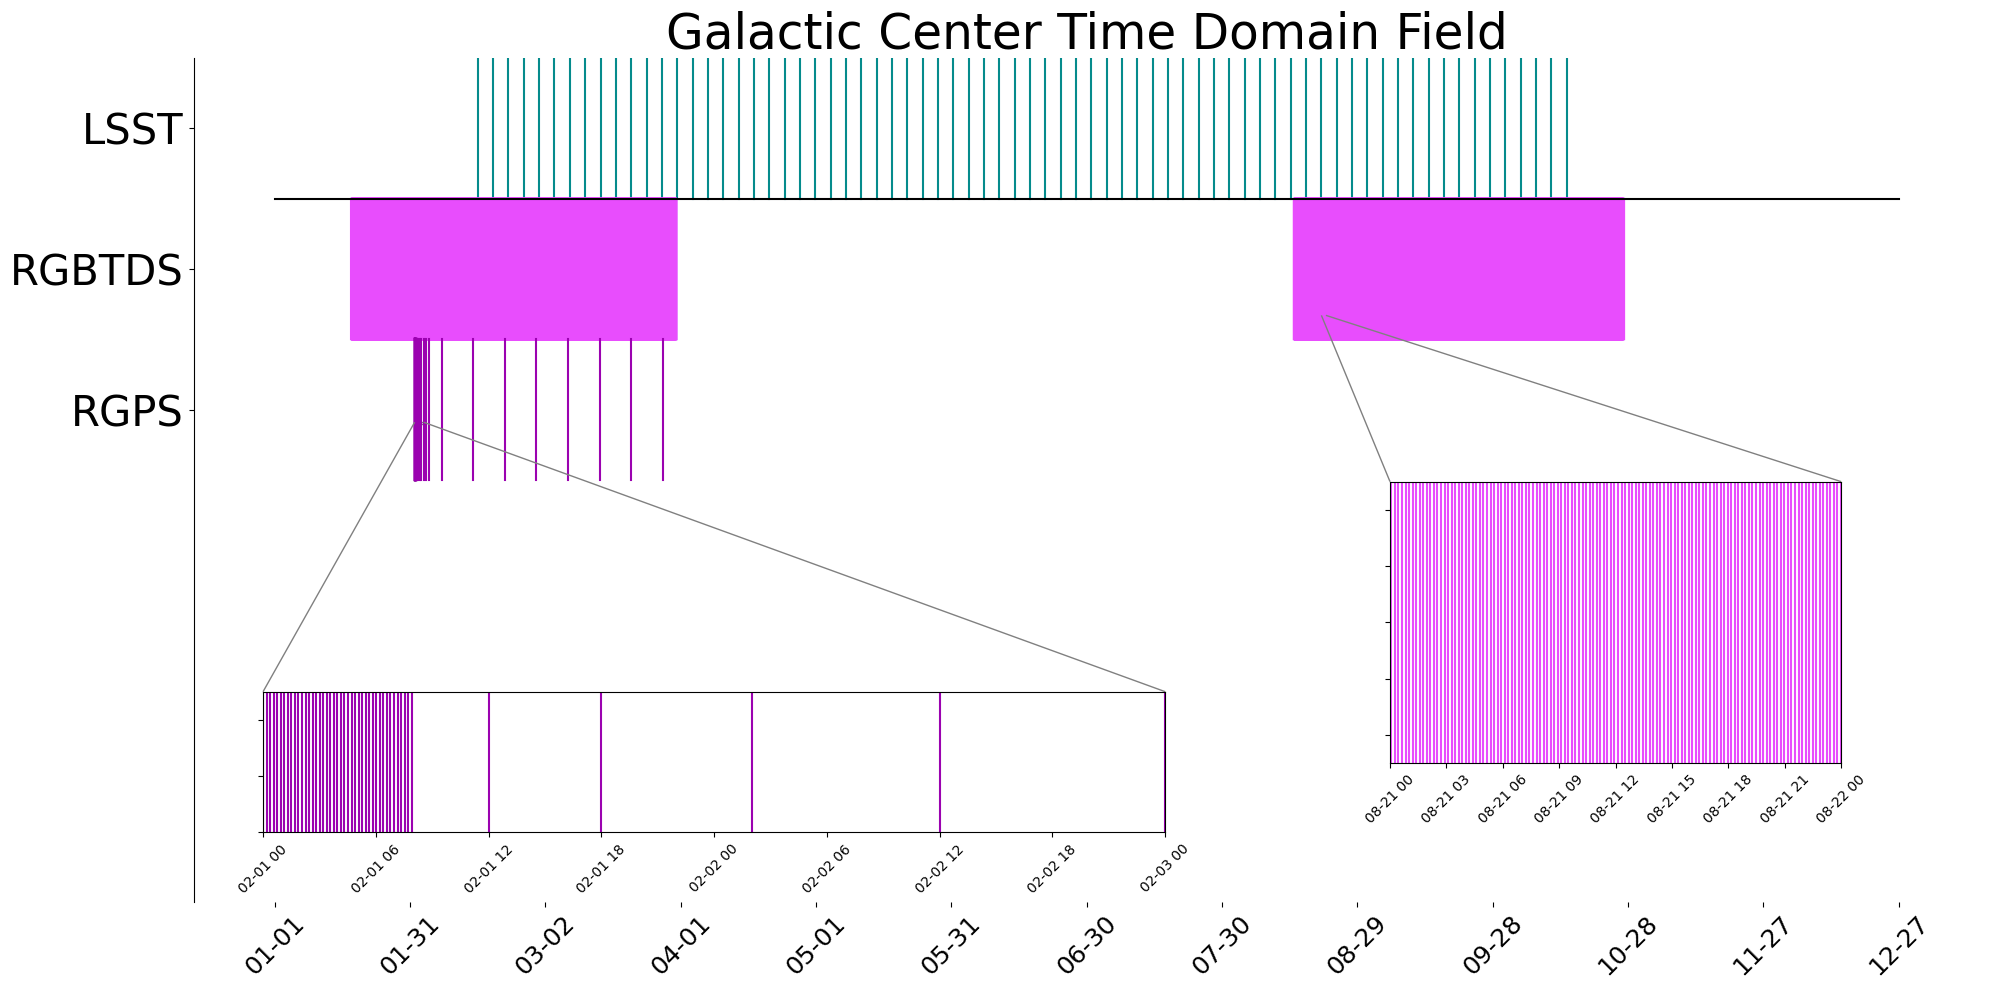

In [220]:
# Plot of 2027 timeline for Rubin and Roman observing cadences
fig, ax = plt.subplots(1,1, figsize=(20,10))

# Plot colors 
rubin_teal = '#058B8C'
roman_pink = '#e84dfd'
roman_purple = '#9b02b0'

# Intervals of Rubin observations
# Plot Rubin data above the x-axis
add_lsst = True
if add_lsst:
    ydata = np.arange(0.0, 1.0, 0.5) 
    # Based on OpSims v3.x+, Rubin is expected to obtain ~70 visits to fields within the Galactic Plane (time domain) survey footprint 
    # in years 1-2 of LSST. Due to the annual visibility of the Plane from Earth, these will necessarily happen between mid-Feb to mid-Oct
    rubin_start_date = datetime.strptime('2027-02-15T00:00:00', '%Y-%m-%dT%H:%M:%S')
    rubin_end_date = datetime.strptime('2027-10-15T00:00:00', '%Y-%m-%dT%H:%M:%S')
    rubin_interval = timedelta(days=3.4)
    rubin_obs = np.arange(rubin_start_date, rubin_end_date, rubin_interval) 
    
    for tobs in rubin_obs:
        ax.plot([tobs]*len(ydata), ydata, c=rubin_teal, ls='-')

# Intervals of RGBTDS observations 
# Plot Roman data below the x-axis
add_rgbtds = True 
if add_rgbtds:
    ydata = np.arange(-0.5, 0.5, 0.5) 
    # Based on the ROTAC 2025 report and the annual visibilty of the Galactic Plane from Roman, Roman 
    # observations are projected to happen between January to March and August to October
    rges_start_date1 = datetime.strptime('2027-01-18T00:00:00', '%Y-%m-%dT%H:%M:%S')
    rges_end_date1 = datetime.strptime('2027-03-31T00:00:00', '%Y-%m-%dT%H:%M:%S')
    rges_interval = timedelta(minutes=11.3)
    rges_obs1 = np.arange(rges_start_date1, rges_end_date1, rges_interval)
    
    rges_start_date2 = datetime.strptime('2027-08-15T00:00:00', '%Y-%m-%dT%H:%M:%S')
    rges_end_date2 = datetime.strptime('2027-10-27T00:00:00', '%Y-%m-%dT%H:%M:%S')
    rges_interva2 = timedelta(minutes=11.3)
    rges_obs2 = np.arange(rges_start_date2, rges_end_date2, rges_interval)
    
    rges_obs = np.hstack((rges_obs1, rges_obs2))
    
    for tobs in rges_obs:
        ax.plot([tobs]*len(ydata), ydata, c=roman_pink, ls='-')

# Intervals of RGPS observations 
# Plot Roman data below the x-axis
add_rgps = True
if add_rgps:
    ydata = np.arange(-1.0, 0.0, 0.5) 
    # Based on the annual visibilty of the Galactic Plane from Roman, and VERY preliminary scheduling assumptions 
    # from the ROTAC 2025 report, simulate the intervals of observation for the RGPS Galactic Center field
    rgps_start_date1 = datetime.strptime('2027-02-01T00:00:00', '%Y-%m-%dT%H:%M:%S')
    rgps_end_date1 = datetime.strptime('2027-02-01T08:00:00', '%Y-%m-%dT%H:%M:%S')
    rgps_interval = timedelta(minutes=11.3)
    rgps_obs1 = np.arange(rgps_start_date1, rgps_end_date1, rgps_interval)
    
    rgps_end_start2 = datetime.strptime('2027-02-01T08:00:00', '%Y-%m-%dT%H:%M:%S')
    rgps_interval = [
        timedelta(hours=4.0),
        timedelta(hours=10.0),
        timedelta(hours=18.0),
        timedelta(hours=28.0),
        timedelta(hours=40.0),
        timedelta(hours=54.0),
        timedelta(hours=70.0),
    ]
    rgps_obs2 = np.array([rgps_end_start2 + dt for dt in rgps_interval])
    rgps_obs = np.hstack((rgps_obs1, rgps_obs2))

    rgps_start_date3 = datetime.strptime('2027-02-07T00:00:00', '%Y-%m-%dT%H:%M:%S')
    rgps_end_date3 = datetime.strptime('2027-03-31T00:00:00', '%Y-%m-%dT%H:%M:%S')
    rgps_interval = timedelta(days=7.0)
    rgps_obs3 = np.arange(rgps_start_date3, rgps_end_date3, rgps_interval)
    rgps_obs = np.hstack((rgps_obs, rgps_obs3))
    
    for tobs in rgps_obs:
        ax.plot([tobs]*len(ydata), ydata, c=roman_purple, ls='-')
    
ax.set_title('Galactic Center Time Domain Field', fontsize=35)
year = '2027'
xtick_start = datetime.strptime('2027-01-01T00:00:00', '%Y-%m-%dT%H:%M:%S')
xtick_end = datetime.strptime('2027-12-31T23:59:59', '%Y-%m-%dT%H:%M:%S')
xtick_interval = timedelta(days=30.0)
xticks = np.arange(xtick_start, xtick_end, xtick_interval) 
xticklabels = [str(np.datetime_as_string(x, unit='D')).replace(year+'-','') for x in xticks]
ax.set_xticks(xticks, xticklabels, rotation=45.0, fontsize=18)
ax.plot(xticks, [0.0]*len(xticks), 'k-')

ax.set_ylim(-2.5, 0.5)
ax.set_yticks([-0.75, -0.25, 0.25], ['RGPS', 'RGBTDS', 'LSST'], fontsize=30)

# Eliminate upper and right axes
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_color('none')

# Inset axis showing zoom-in of RGPS cadence
axins = zoomed_inset_axes(ax, zoom=100, loc='lower left', borderpad=5.0) 
ydata = np.arange(-1.0, 0.0, 0.5)
for tobs in rgps_obs:
    axins.plot([tobs]*len(ydata), ydata, c=roman_purple, ls='-')
xmin, xmax = axins.get_xlim()
axins.set(xlim=[20850.0, 20852.0], ylim=[-0.8, -0.795])

mark_inset(ax, axins, loc1=1, loc2=2, fc="none", ec="0.5")
axins.tick_params(labelleft=False)
ins_xticks = axins.get_xticks()
labels = axins.get_xticklabels()
ins_xticklabels = [str(x.get_text()).replace(year+'-','') for x in labels]
axins.set_xticks(ins_xticks, ins_xticklabels, rotation=45.0)


# Inset axis showing zoom-in of RGBTDS cadence
axins2 = zoomed_inset_axes(ax, zoom=100, loc='lower right', borderpad=10.0) 
ydata = np.arange(-0.5, 0.5, 0.5)
for tobs in rges_obs:
    axins2.plot([tobs]*len(ydata), ydata, c=roman_pink, ls='-')
xmin, xmax = axins2.get_xlim()
axins2.set(xlim=[21051.0, 21052.0], ylim=[-0.425, -0.415])

mark_inset(ax, axins2, loc1=1, loc2=2, fc="none", ec="0.5")
axins2.tick_params(labelleft=False)
ins_xticks = axins2.get_xticks() 
ins_xticklabels = axins2.get_xticklabels()
axins2.set_xticks(ins_xticks, ins_xticklabels, rotation=45.0)

plt.draw()
plt.tight_layout()
plt.savefig('./rubin_roman_obs_cadence_galcenter.png')